# Odd Even Vetter Example

This vetter looks for eclipsing binaries mascarading as transits.  Planet transit detection algorithms often find eclipsing binaries at half the period. In this case, the primary eclipse will be the odd events and the secondary eclipse will be the even transits. The odd-even transit vetter looks for this possibility by examining the depth of the even numbered transits compared to the odd numbered transits. If the depth changes, likely you have an eclipsing binary detected at half its period.

In [1]:
from exovetter.tce import Tce
from exovetter import vetters as vet
from exovetter import const as exo_const
import lightkurve as lk
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

## Setup
Exovetter vetting alogrithms use TCE and lightkurve objects as input

In [2]:
# WASP-18 b TCE:
period = 0.94145223 * u.day
epoch = 1354.4579 * u.day
epoch_offset = exo_const.btjd
depth = 0.00931894 * exo_const.frac_amp
duration = 0.08932 * u.day

# create a TCE object using the exovetter.tce.Tce class
tce = Tce(period=period, epoch=epoch, epoch_offset=epoch_offset, 
          depth=depth, duration=duration, comment='example')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 1354.4579 d>,
 'epoch_offset': <Quantity -2457000. d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'comment': 'example'}

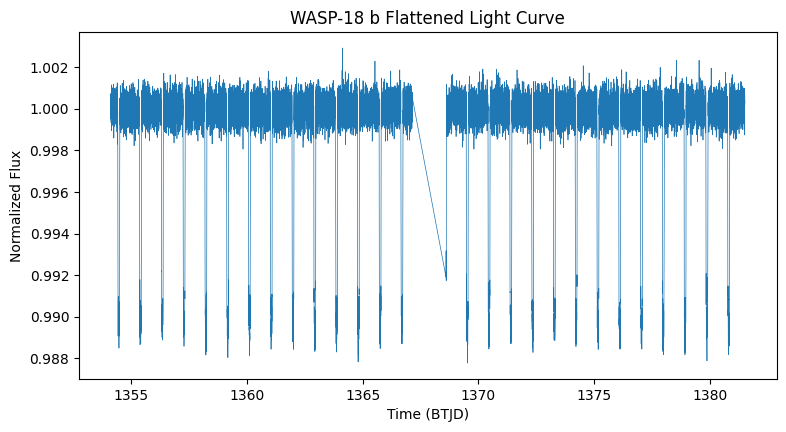

In [3]:
# Read in the flattened WASP-18 b lightkurve object
lc = lk.read('wasp18b.fits')

# plot light curve
plt.figure(figsize=(9,4.5))
plt.plot(lc.time.value, lc.flux.value, lw=0.5) 
plt.title('WASP-18 b Flattened Light Curve')
plt.xlabel('Time (BTJD)')
plt.ylabel('Normalized Flux')
plt.show()

## Vetting
Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.OddEven`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
odd_even_instance = vet.OddEven()
odd_even_results = odd_even_instance.run(tce, lc)

odd_even_results

{'oe_sigma': 0.1028040042876017,
 'odd_depth': [0.98964864, 0.00054403394],
 'even_depth': [0.98956954, 0.00054403394]}

In Odd Even, the results are as follows:
* oe_sigma : significance of difference of odd/even depth measurements
* odd_depth : depth and error on depth of the odd transits
* even_depth : depth and error on depth of the even transits

The following attributes are also available after running the vetter object:
* metrics : modshift result dictionary.

## Plots
In order to generate diagnostic plots from vetters, we use the `plot` method with the vetter object after it has been run.

<Figure size 640x480 with 0 Axes>

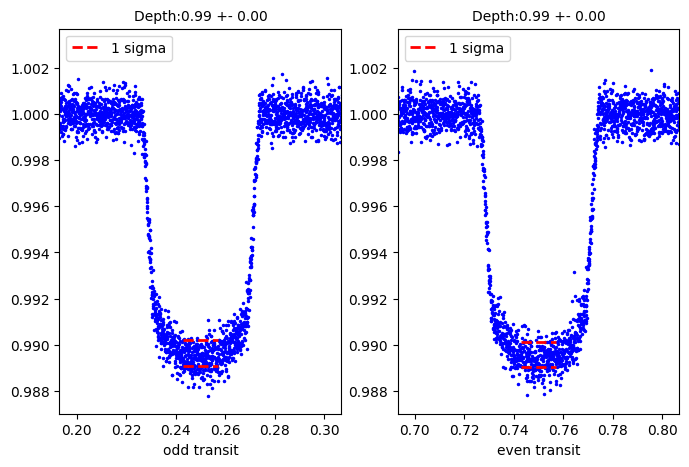

In [5]:
plt.figure()
odd_even_instance.plot()
plt.show()

The same plots are made when using `plot=True` during the `run` method.

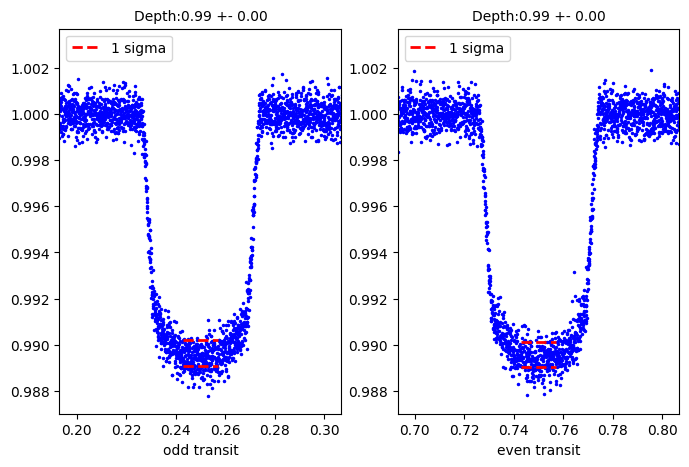

In [6]:
odd_even_results = odd_even_instance.run(tce, lc, plot=True)